# Calories Burnt Using Machine Learning


In [2]:
import pandas as pd
calories = pd.read_csv('calories.csv')
exercise= pd.read_csv('exercise.csv')
import pickle

In [3]:
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [4]:
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [5]:
print(calories.shape)
print(exercise.shape)


(15000, 2)
(15000, 8)


In [6]:
print(calories.columns)
print(exercise.columns)

Index(['User_ID', 'Calories'], dtype='object')
Index(['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp'],
      dtype='object')


In [7]:
print("\nCalories Data Info:")
print(calories.info())


Calories Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User_ID   15000 non-null  int64  
 1   Calories  15000 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 234.5 KB
None


In [8]:
print("\nExercise Data Info:")
print(exercise.info())



Exercise Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
dtypes: float64(5), int64(2), object(1)
memory usage: 937.6+ KB
None


# Cleaning Data

In [9]:
print("\nMissing Values in Calories Data:")
print(calories.isnull().sum())



Missing Values in Calories Data:
User_ID     0
Calories    0
dtype: int64


In [10]:
print("\nMissing Values in Exercise Data:")
print(exercise.isnull().sum())


Missing Values in Exercise Data:
User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
dtype: int64


In [11]:
merged_data = exercise.merge(calories, on='User_ID')

In [12]:

summary_stats = merged_data.describe()
print(summary_stats)


            User_ID           Age        Height        Weight      Duration  \
count  1.500000e+04  15000.000000  15000.000000  15000.000000  15000.000000   
mean   1.497736e+07     42.789800    174.465133     74.966867     15.530600   
std    2.872851e+06     16.980264     14.258114     15.035657      8.319203   
min    1.000116e+07     20.000000    123.000000     36.000000      1.000000   
25%    1.247419e+07     28.000000    164.000000     63.000000      8.000000   
50%    1.499728e+07     39.000000    175.000000     74.000000     16.000000   
75%    1.744928e+07     56.000000    185.000000     87.000000     23.000000   
max    1.999965e+07     79.000000    222.000000    132.000000     30.000000   

         Heart_Rate     Body_Temp      Calories  
count  15000.000000  15000.000000  15000.000000  
mean      95.518533     40.025453     89.539533  
std        9.583328      0.779230     62.456978  
min       67.000000     37.100000      1.000000  
25%       88.000000     39.600000     

In [13]:

data_info = merged_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [14]:

missing_values = merged_data.isnull().sum()
print(missing_values)


User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64


In [15]:
gender_counts = merged_data['Gender'].value_counts()
print(gender_counts)

Gender
female    7553
male      7447
Name: count, dtype: int64


# Univariate analysis


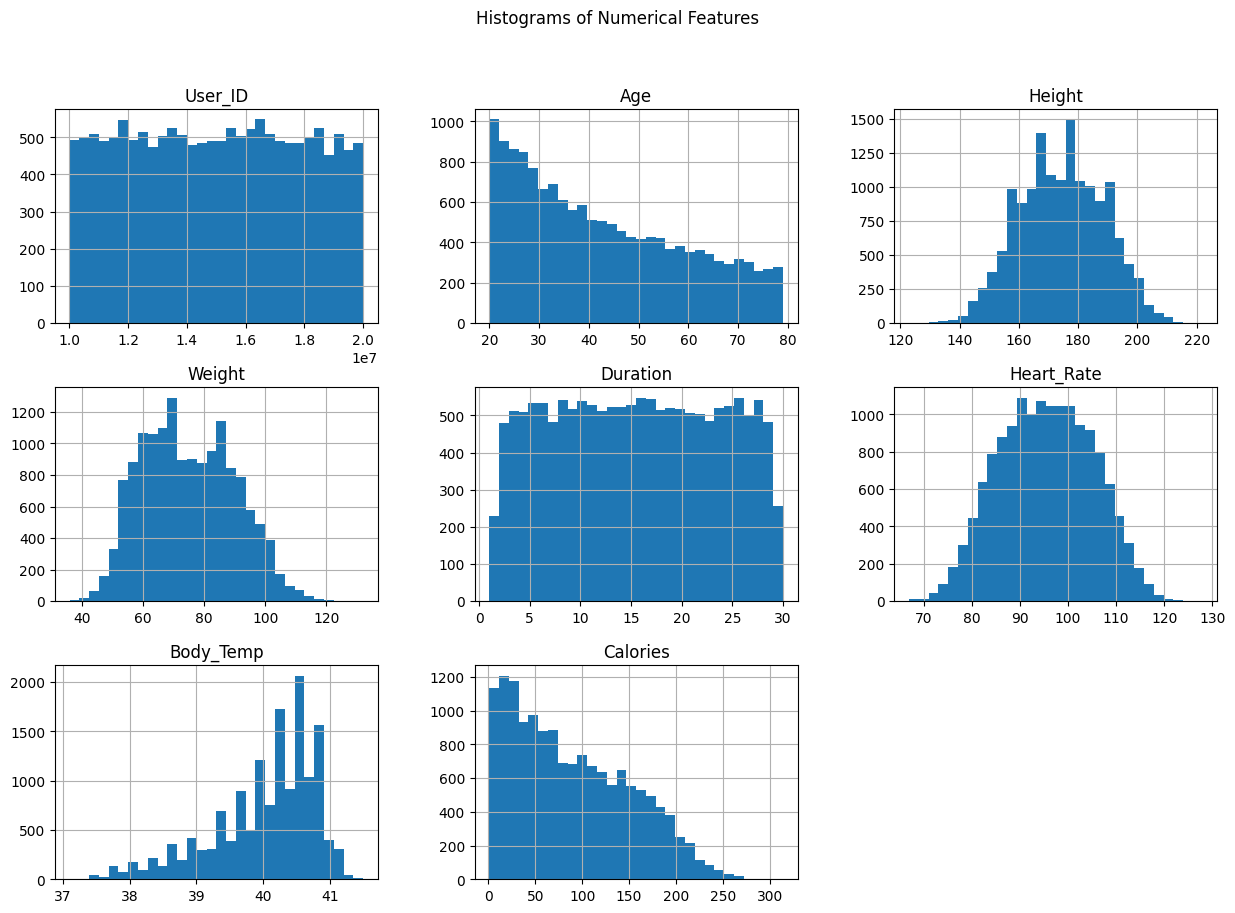

In [16]:
import matplotlib.pyplot as plt
merged_data.hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()


# Bi or Multivariate Analysis

# Scatterplot

<Axes: xlabel='Age', ylabel='Calories'>

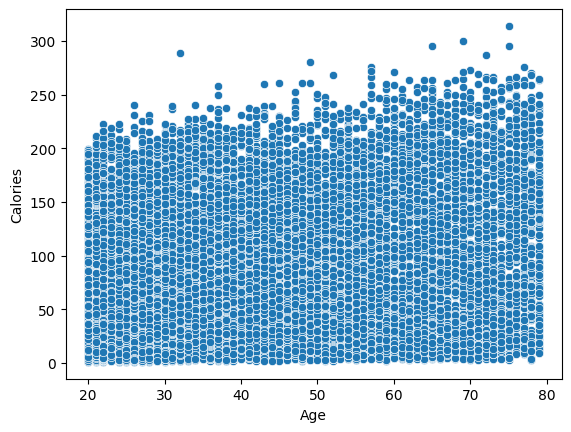

In [17]:
import seaborn as sns

sns.scatterplot(x=merged_data['Age'],y=merged_data['Calories'])

<Axes: xlabel='Calories', ylabel='Height'>

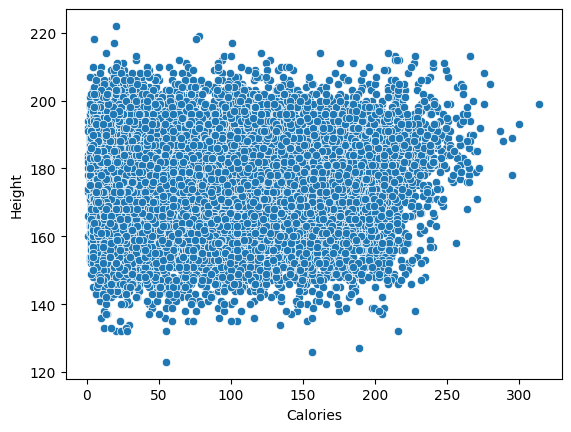

In [18]:
sns.scatterplot(x=merged_data['Calories'],y=merged_data['Height'])

<Axes: xlabel='Age', ylabel='Duration'>

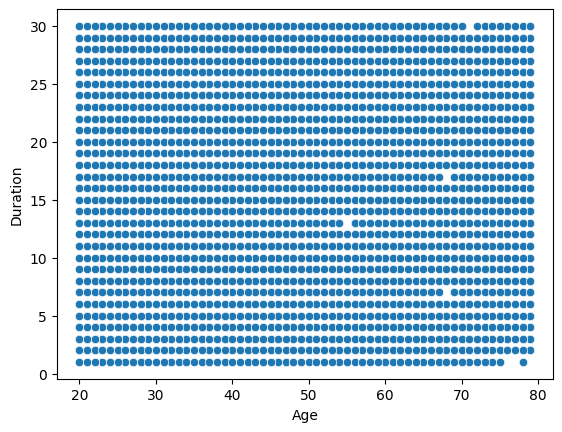

In [19]:
sns.scatterplot(x=merged_data['Age'],y=merged_data['Duration'])

<Axes: xlabel='Calories', ylabel='Duration'>

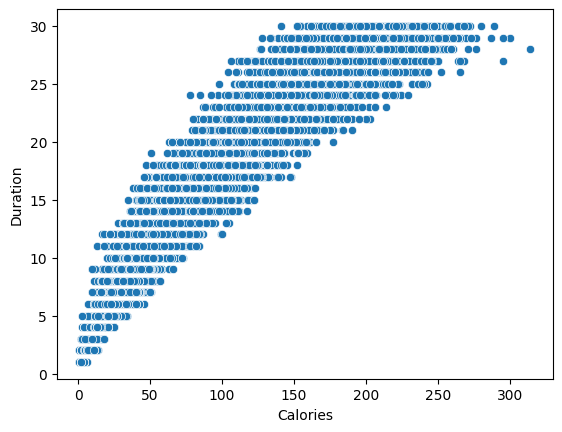

In [20]:
sns.scatterplot(x=merged_data['Calories'],y=merged_data['Duration'])

<Axes: xlabel='Duration', ylabel='Calories'>

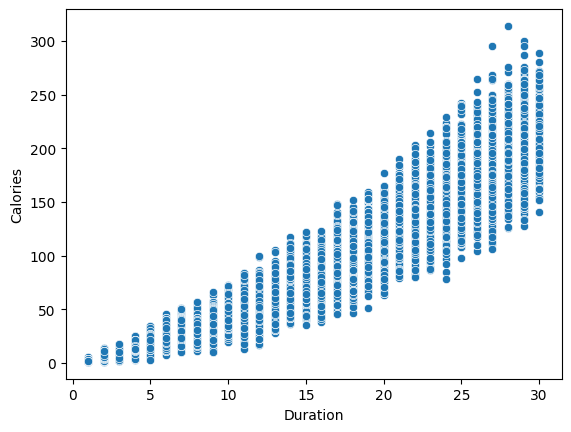

In [21]:
sns.scatterplot(x=merged_data['Duration'],y=merged_data['Calories'])

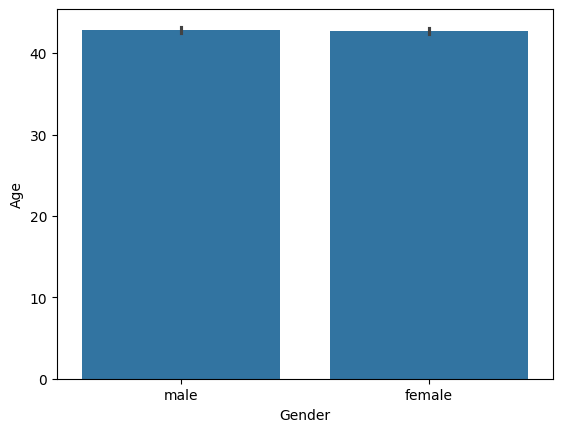

In [22]:
sns.barplot(x=merged_data['Gender'], y=merged_data['Age'])
plt.show()


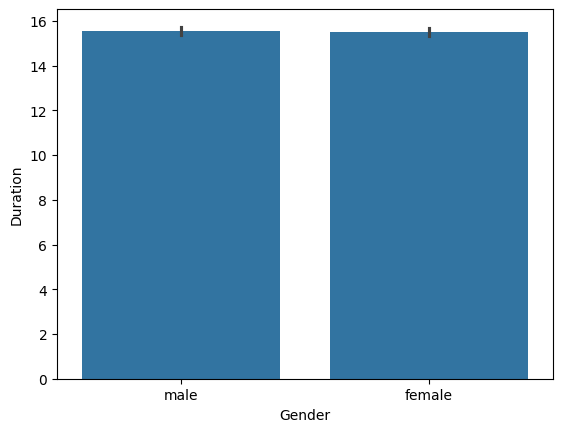

In [23]:
sns.barplot(x=merged_data['Gender'], y=merged_data['Duration'])
plt.show()


# Boxplot

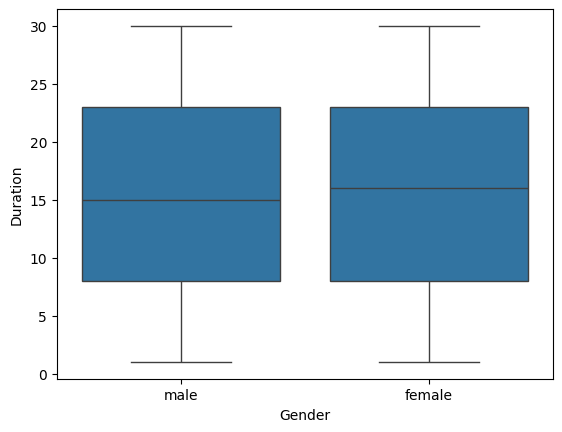

In [24]:
sns.boxplot(x=merged_data['Gender'], y=merged_data['Duration'])
plt.show()


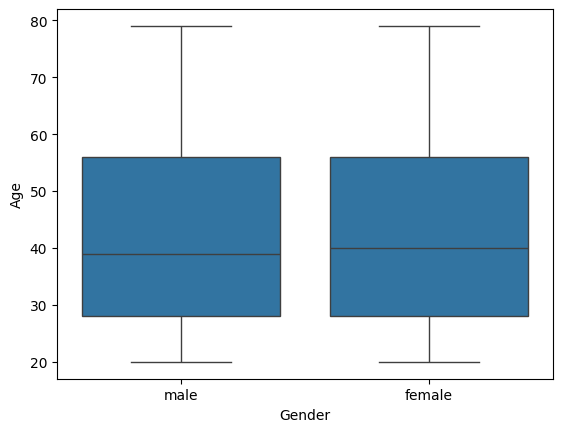

In [25]:
sns.boxplot(x=merged_data['Gender'], y=merged_data['Age'])
plt.show()


In [26]:
merged_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


# Distplot

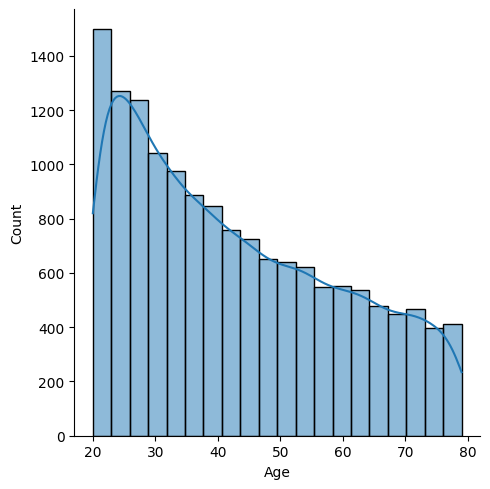

In [27]:

sns.displot(merged_data['Age'], bins=20, kde=True)
plt.show()



# Lineplot

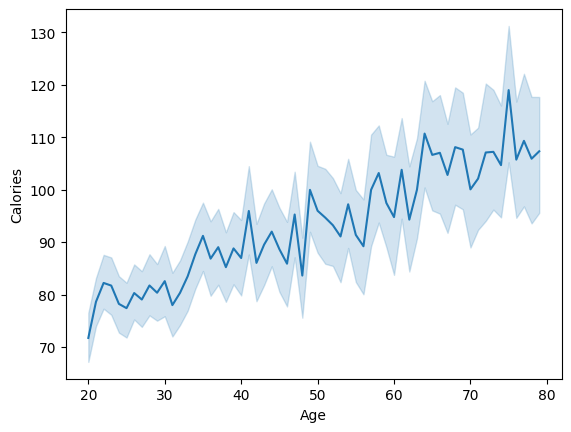

In [28]:
sns.lineplot(x=merged_data['Age'], y=merged_data['Calories'])
plt.show()


# Finding Outliers

In [29]:
from scipy.stats import zscore
merged_data['Calories_zscore'] = zscore(merged_data['Calories'])
outliers_zscore = merged_data[merged_data['Calories_zscore'].abs() > 3]
print(outliers_zscore)

        User_ID Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
428    13079051   male   75   199.0   103.0      28.0       123.0       40.5   
3357   17825244   male   65   189.0    98.0      27.0       125.0       40.9   
3450   11190875   male   49   205.0   101.0      30.0       119.0       40.8   
6240   17545969   male   69   193.0    90.0      29.0       121.0       41.1   
9981   12114332   male   32   188.0    91.0      30.0       128.0       40.9   
13871  10784322   male   75   178.0    76.0      29.0       120.0       40.8   
14001  19360607   male   72   191.0    97.0      29.0       116.0       41.0   

       Calories  Calories_zscore  
428       314.0         3.593961  
3357      295.0         3.289742  
3450      280.0         3.049568  
6240      300.0         3.369799  
9981      289.0         3.193672  
13871     295.0         3.289742  
14001     287.0         3.161649  


In [30]:
Q1 = merged_data['Calories'].quantile(0.25)
Q3 = merged_data['Calories'].quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = merged_data[(merged_data['Calories'] < (Q1 - 1.5 * IQR)) | (merged_data['Calories'] > (Q3 + 1.5 * IQR))]
print(outliers_iqr)

        User_ID Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
428    13079051   male   75   199.0   103.0      28.0       123.0       40.5   
3357   17825244   male   65   189.0    98.0      27.0       125.0       40.9   
6240   17545969   male   69   193.0    90.0      29.0       121.0       41.1   
13871  10784322   male   75   178.0    76.0      29.0       120.0       40.8   

       Calories  Calories_zscore  
428       314.0         3.593961  
3357      295.0         3.289742  
6240      300.0         3.369799  
13871     295.0         3.289742  


# Removing outlier

In [31]:
merged_data['Calories_zscore'] = zscore(merged_data['Calories'])
threshold = 3
outliers_zscore = merged_data[merged_data['Calories_zscore'].abs() > threshold]
cleaned_data = merged_data[merged_data['Calories_zscore'].abs() <= threshold]
cleaned_data = cleaned_data.drop(columns=['Calories_zscore'])
print(cleaned_data)


        User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0      14733363    male   68   190.0    94.0      29.0       105.0       40.8   
1      14861698  female   20   166.0    60.0      14.0        94.0       40.3   
2      11179863    male   69   179.0    79.0       5.0        88.0       38.7   
3      16180408  female   34   179.0    71.0      13.0       100.0       40.5   
4      17771927  female   27   154.0    58.0      10.0        81.0       39.8   
...         ...     ...  ...     ...     ...       ...         ...        ...   
14995  15644082  female   20   193.0    86.0      11.0        92.0       40.4   
14996  17212577  female   27   165.0    65.0       6.0        85.0       39.2   
14997  17271188  female   43   159.0    58.0      16.0        90.0       40.1   
14998  18643037    male   78   193.0    97.0       2.0        84.0       38.3   
14999  11751526    male   63   173.0    79.0      18.0        92.0       40.5   

       Calories  
0        

# ENCODING

In [32]:
df=exercise.merge(calories,on='User_ID')
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [33]:
df['Gender']=df['Gender'].map({'male':1,'female':0})

In [34]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,0,27,154.0,58.0,10.0,81.0,39.8,35.0


In [35]:
X=df.drop(['User_ID','Calories'],axis=1)
y=df['Calories']
X.shape

(15000, 7)

In [36]:
y.shape

(15000,)

# SPLIT DATA

In [37]:
import sklearn
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [38]:
X_train.shape

(12000, 7)

In [39]:
X_test.shape

(3000, 7)

In [40]:
y_train.shape

(12000,)

In [41]:
y_test.shape

(3000,)


# TRAINING MODEL


In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score


In [43]:
lr_model = LinearRegression()
dtr_model = DecisionTreeRegressor()
rfr_model = RandomForestRegressor()
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)


In [44]:
lr_model.fit(X_train, y_train)
lr_y_pred = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_y_pred)
lr_r2 = r2_score(y_test, lr_y_pred)
print("Linear Regression:")
print(f"Mean Squared Error (MSE): {lr_mse}")
print(f"R² Score: {lr_r2}\n")

Linear Regression:
Mean Squared Error (MSE): 131.99574575081704
R² Score: 0.9672937151257295



In [45]:
dtr_model.fit(X_train, y_train)
dtr_y_pred = dtr_model.predict(X_test)
dtr_mse = mean_squared_error(y_test, dtr_y_pred)
dtr_r2 = r2_score(y_test, dtr_y_pred)
print("Decision Tree Regressor:")
print(f"Mean Squared Error (MSE): {dtr_mse}")
print(f"R² Score: {dtr_r2}\n")


Decision Tree Regressor:
Mean Squared Error (MSE): 27.808333333333334
R² Score: 0.993109571322127



In [46]:
rfr_model.fit(X_train, y_train)
rfr_y_pred = rfr_model.predict(X_test)
rfr_mse = mean_squared_error(y_test, rfr_y_pred)
rfr_r2 = r2_score(y_test, rfr_y_pred)
print("Random Forest Regressor:")
print(f"Mean Squared Error (MSE): {rfr_mse}")
print(f"R² Score: {rfr_r2}\n")

Random Forest Regressor:
Mean Squared Error (MSE): 7.043857566666666
R² Score: 0.99825465274749



In [47]:
xgb_model.fit(X_train, y_train)
xgb_y_pred = xgb_model.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_y_pred)
xgb_r2 = r2_score(y_test, xgb_y_pred)
print("XGBoost Regressor:")
print(f"Mean Squared Error (MSE): {xgb_mse}")
print(f"R² Score: {xgb_r2}\n")

XGBoost Regressor:
Mean Squared Error (MSE): 4.568956111227719
R² Score: 0.9988678909361673



# SELECTING MODEL

In [48]:
xgb_model = xgb.XGBRegressor()

In [52]:
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)


In [53]:
import pickle
pickle.dump(xgb_model ,open('xgb_model .pkl','wb'))

In [54]:
X_train.to_csv('X_train.csv')